**Análise de Cluster**

> Utilizando o dataset [Mall_Customers](https://www.kaggle.com/datasets/akram24/mall-customers?select=Mall_Customers.csv)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

In [7]:
dataset = pd.read_csv('Mall_Customers.csv')

In [8]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
x = dataset.iloc[:, [3,4]]

In [11]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


**Aplicando Dendograma, com o objetivo de encontrar o número de Clusters**

In [12]:
import scipy.cluster.hierarchy as sch

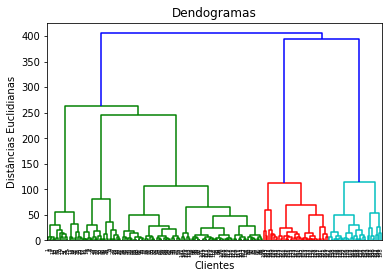

In [16]:
dendograma = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendogramas')
plt.xlabel('Clientes')
plt.ylabel('Distâncias Euclidianas')
plt.show()

In [17]:
from sklearn.cluster import AgglomerativeClustering

In [20]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

In [19]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

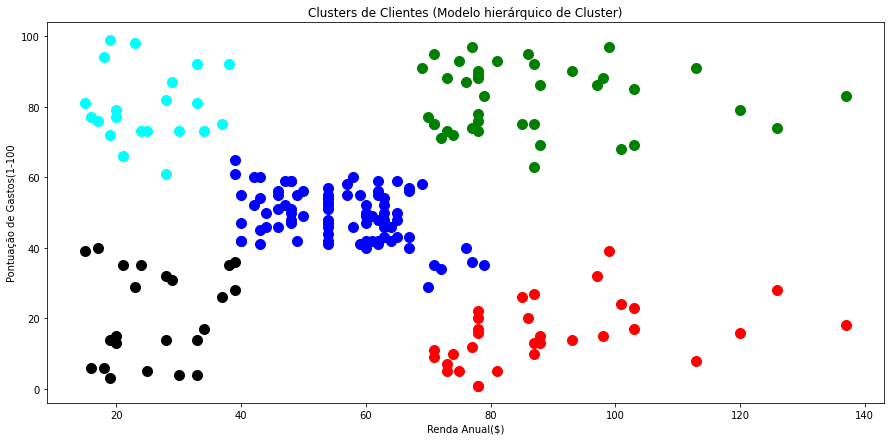

In [39]:
plt.figure(1, figsize = (15,7))
plt.scatter(x[y_hc == 0]['Annual Income (k$)'], x[y_hc == 0]['Spending Score (1-100)'], s = 100, c= 'red', label = 'Cluster1')
plt.scatter(x[y_hc == 1]['Annual Income (k$)'], x[y_hc == 1]['Spending Score (1-100)'], s = 100, c= 'blue', label = 'Cluster2')
plt.scatter(x[y_hc == 2]['Annual Income (k$)'], x[y_hc == 2]['Spending Score (1-100)'], s = 100, c= 'green', label = 'Cluster3')
plt.scatter(x[y_hc == 3]['Annual Income (k$)'], x[y_hc == 3]['Spending Score (1-100)'], s = 100, c= 'cyan', label = 'Cluster4')
plt.scatter(x[y_hc == 4]['Annual Income (k$)'], x[y_hc == 4]['Spending Score (1-100)'], s = 100, c= 'black', label = 'Cluster5')
plt.title('Clusters de Clientes (Modelo hierárquico de Cluster)')
plt.xlabel('Renda Anual($)')
plt.ylabel('Pontuação de Gastos(1-100')
plt.show()

**Representando visualmente o número de Clusters**

In [27]:
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import os
py.offline.init_notebook_mode(connected = True)

In [29]:
df = pd.read_csv('Mall_Customers.csv')

In [30]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [33]:
from pandas.core import algorithms
x2 = df[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:,:].values
inertia = []
for n in range (1,11):
  algorithm = (KMeans(n_clusters =n))
  algorithm.fit(x2)
  inertia.append(algorithm.inertia_)

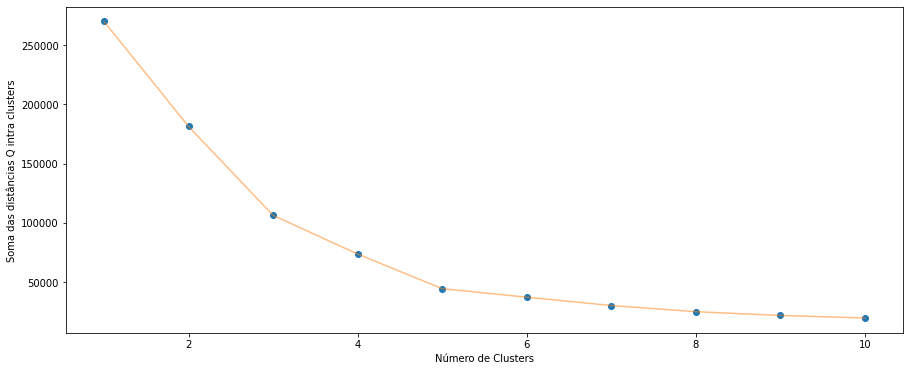

In [34]:
plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Número de Clusters')
plt.ylabel('Soma das distâncias Q intra clusters')
plt.show()

In [36]:
algorithm = (KMeans(n_clusters = 5))
algorithm.fit(x2)

KMeans(n_clusters=5)

In [37]:
x2

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

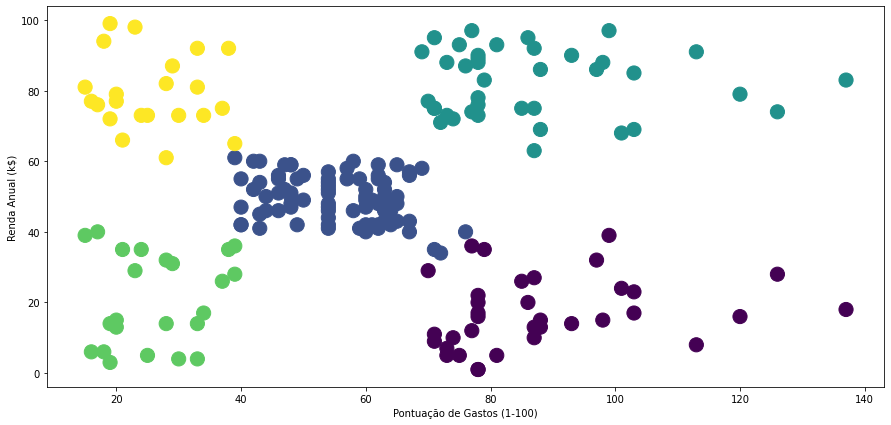

In [38]:
labels2 = algorithm.labels_
plt.figure(1, figsize = (15, 7))
plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', 
            data =  df, c = labels2, s = 200)
plt.xlabel('Pontuação de Gastos (1-100)')
plt.ylabel('Renda Anual ($)')
plt.show()



```
# Desenvolvido por: Maria Eduarda Smidt
```

